# Grafische Darstellung von ebenen Parameterkurven mit Python

__Manfred Brill, Hochschule Kaiserslautern__

Wir können ebene Parameterkurven skizzieren, aber selbstverständlich können wir auch die Mittel verwenden die uns
Python bietet. Wir verwenden entweder *Matplotlib* oder *plotly* für die grafische Ausgabe. Ein Beispiel für den Python-Code
finden wir auch in den Handouts der Vorlesung.

## Ebene Parameterkurven als Python-Funktionen
Wir implementieren einige Beispiele, angefangen mit unserem ersten Vorlesungs-Beispiel, das wir als first_example wiederfinden. 
Auch der Kreis als Funktion circle finden wir unten. Die Parameter wechseln abhängig von der Kurve. Beim Kreis mit Mittelpunkt im Ursprung ist es sicher sinnvoll, den Radius übergeben zu können. Was wir immer finden sind die Grenzen a und b für das Parameterintervall und die Anzahl der Punkte im Polygonzug, den wir für die Visualisierung einsetzen.
Mit dieser Wert für n erzeugen wir mit der Funktion np.linspace die t-Werte für den Polgyonzug und berechnen anschließend die x- und y-Werte, die wir mit return zurückgeben.

In [1]:
import numpy as np


def first_example(a=-2.0, b=4.0, n=10):
    t = np.linspace(a, b, n)
    x = t*t-2.0*t
    y = t + 1.0
    return x, y


def circle(radius=1.0, a=0.0, b=1.0, n=4):
    t = np.linspace(a, b, n)
    x = radius*np.cos(2.0*np.pi*t)
    y = radius*np.sin(2.0*np.pi*t)
    return x, y


def unit_circle(a=0.0, b=1.0, n=4):  
    return circle(radius=1.0, a=a, b=b, n=n)


def aufgabe2(a=0.1, b=5.0, n=4):
    t = np.linspace(a, b, n)
    x =t*t*t*t - t*t
    y = t + np.log(t)
    return x, y    

## Matplotlib
Wenn wir Matplotlib verwenden benötigen wir natürlich einen entsprechenden import. Dann erzeugen wir die Punkte auf der ebenen Parameterkurve, die wir darstellen möchten und verwenden diese als Eingabe in die Funktion *plot*. Dabei können wir steuern ob wir nur die Punkte oder einen Polygonzug darstellen möchten. In der Vorlesung haben wir mit den Punkten begonnen, die wir auch in einer Wertetabelle berechnet hatten.

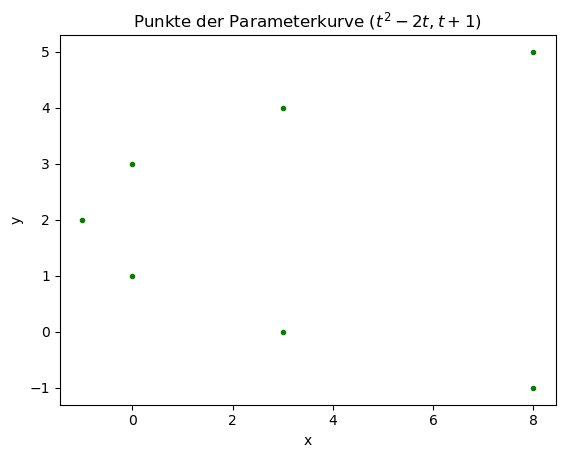

In [2]:
import matplotlib.pyplot as plt

x, y = first_example(n=7)

fig = plt.figure()
plt.plot(x, y, 'go', markersize=3.0)
plt.title('Punkte der Parameterkurve $(t^2-2t, t+1)$')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Statt der Punkte einen Polygonzug auszugeben ist jetzt einfach. Wir verändern die Option für die Funktion *plt.plot*. Sinnvoll ist es sicher auch mehr Punkte zu berechnen, damit wir den Eindruck einer Parameterkurve erhalten und nicht nur einen groben Polygonzug zu sehen. Wir erzeugen jetzt beide Abbildungen, einmal die Version mit 7 Punkten und dann mit einem deutlich feineren Polygonzug.

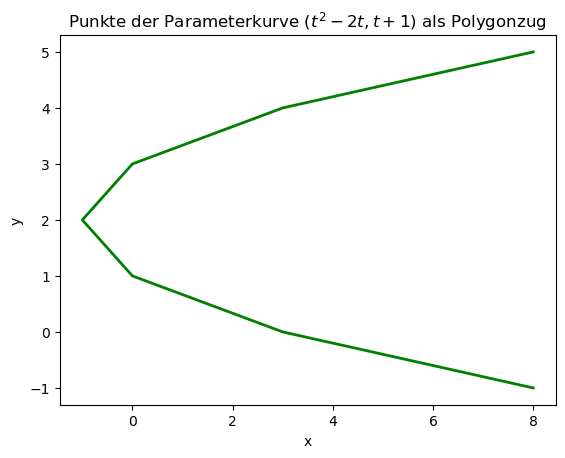

In [3]:
fig = plt.figure()
plt.plot(x, y, 'g-', linewidth=2.0)
plt.title('Punkte der Parameterkurve $(t^2-2t, t+1)$ als Polygonzug')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Wir verwenden 100 Punkte für den Polygonzug und erhalten ein deutlich besseres Bild der Parameterkurve.

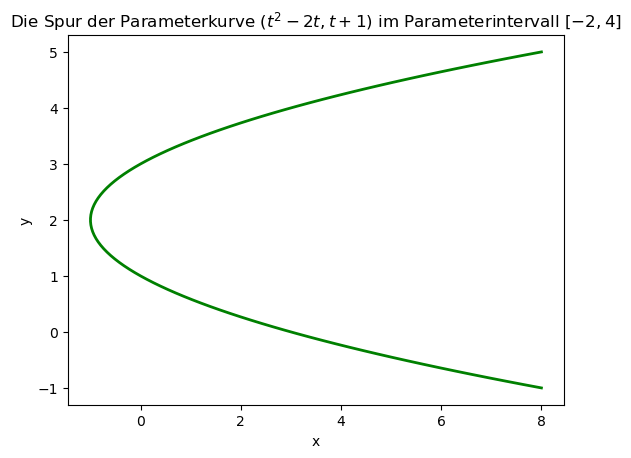

In [4]:
x, y = first_example(n=100)

fig = plt.figure()
plt.plot(x, y, 'g-', linewidth=2.0)
plt.title('Die Spur der Parameterkurve $(t^2-2t, t+1)$ im Parameterintervall $[-2, 4]$')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Natürlich können wir jetzt auch einen Kreis ausgeben. Wir verwenden die Funktion *unit_circle* die wir oben implementiert haben und tauschen die Berechnung der x- und y-Koordinaten aus.

<Figure size 640x480 with 0 Axes>

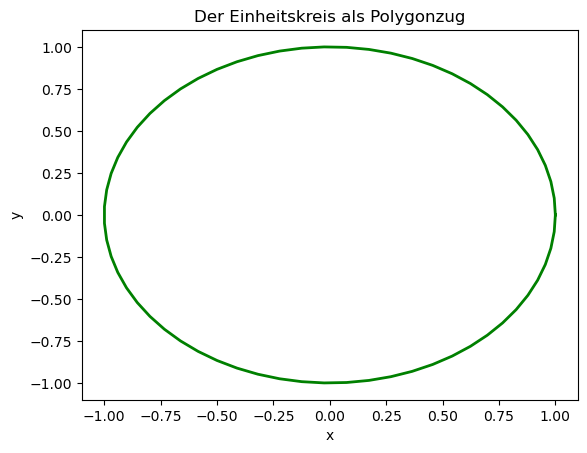

In [5]:
x, y = unit_circle(n=64)

fig = plt.figure()
plt.figure()
plt.plot(x, y, 'g-', linewidth=2.0)
plt.title('Der Einheitskreis als Polygonzug')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Diese grafische Ausgabe sollte Ihnen seltsam vorkommen - in der Überschrift steht etwas von Einheitskreis, aber mit ziemlicher Sicherheit sehen wir ein *Osterei*. Das liegt daran, dass wir bei solchen Ausgaben auf das Seitenverhältnis achten sollten. Wenn wir einen Kreis ausgeben und das auch wie ein Kreis aussehen soll geben wir der Funktion *plt.figure* eine Information über die Bildgröße mit wie im folgenden Code. Quadratische Bilder erhalten wir mit einem Seitenverhältnis von 1:1. Der englische Begriff für Seitenverhältnis ist *aspecdt ratio*.

<Figure size 400x400 with 0 Axes>

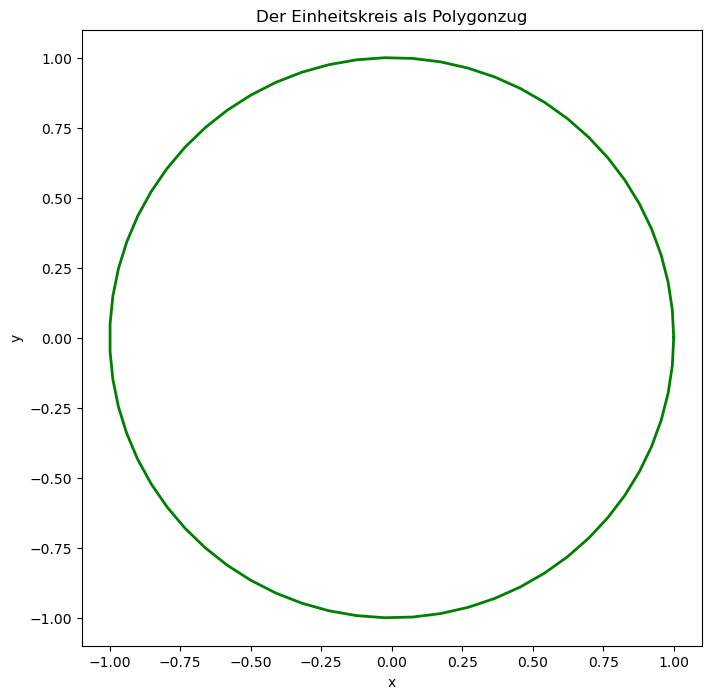

In [6]:
fig = plt.figure(figsize=(4.0, 4.0))
plt.figure(figsize=(8.0, 8.0))
plt.plot(x, y, 'g-', linewidth=2.0)
plt.title('Der Einheitskreis als Polygonzug')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Plotly
Wenn wir Plotly verwenden ändert sich eigentlich nur der Teil, in dem wir eine Abbildung erzeugen und den Polygonzug ausgeben. Wir steigen direkt ein und erzeugen wieder eine Ausgabe 
unseres ersten Beispiels mit den 7 Punkten.

In [7]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'notebook_connected+jupyterlab'

Die Zuweisung auf die Variable *pio.renderers.default* in diesen Notebooks sorgt dafür, dass man die Ausgabe in Jupyter Lab sieht. Die Notebooks werden in diesem Werkzeug verfasst. Damit die Ausgaben auch in den exportierten HTML-Dateien angezeigt werden, dafür sorgt der Renderer *notebook_connected*. Wir können bei Bedarf mit einem Plus-Zeichen noch weitere Renderer hinzufügen.

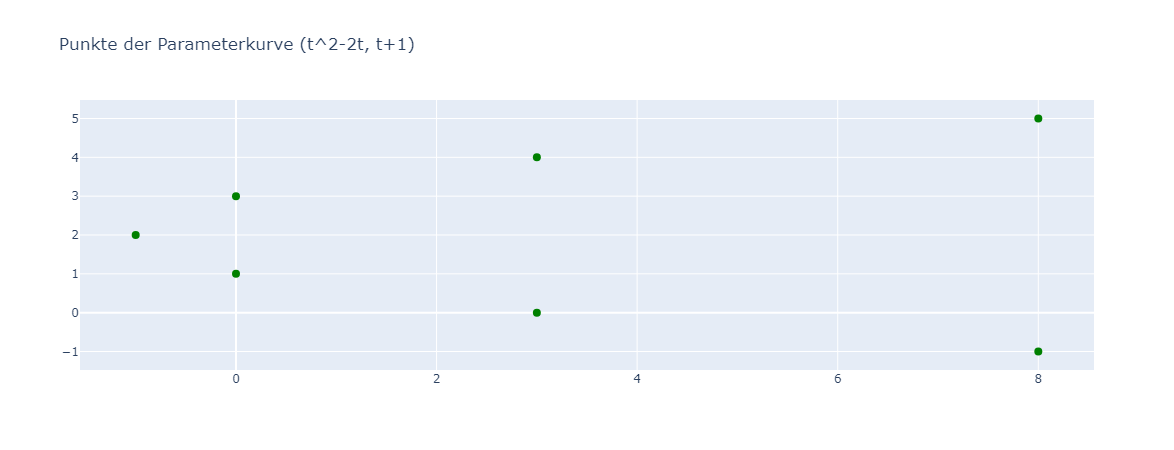

In [8]:
x, y = first_example(n=7)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         mode='markers',
                         name='$first_example',
                         marker=dict(color='green', size=8)
                        )
              )

fig.update_layout(title='Punkte der Parameterkurve (t^2-2t, t+1)', 
                  width=900, 
                  height=450)
fig.show()

Auch mit Plotly ist der Wechsel zwischen der Ausgabe von Punkten oder eines Polygonzugs eine Option, hier der Funktion *go.Scatter*.

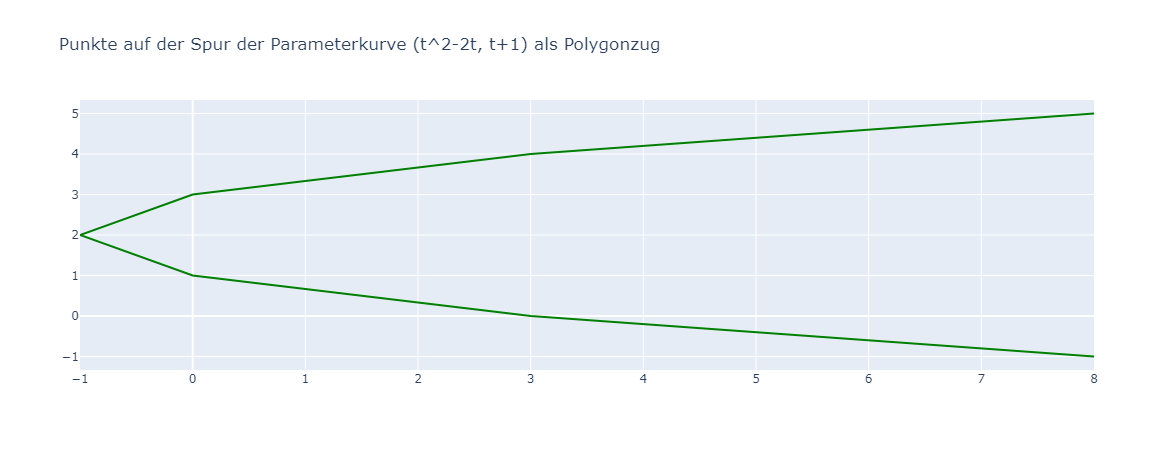

In [9]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, 
               y=y,
               mode='lines',
               name='$first_example',
               marker=dict(color='green', size=8)
              )
    )

fig.update_layout(title='Punkte auf der Spur der Parameterkurve (t^2-2t, t+1) als Polygonzug', 
                  width=900, 
                  height=450)
fig.show()

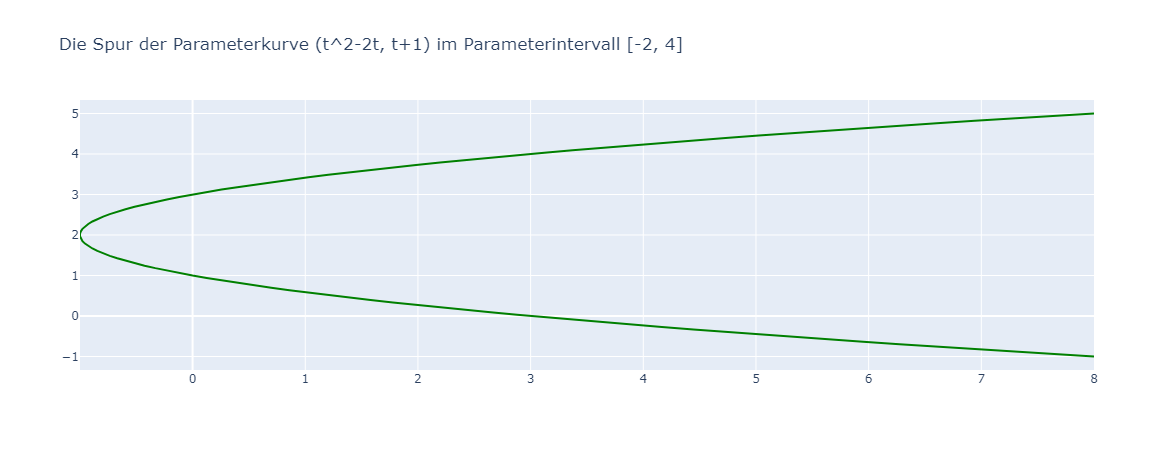

In [10]:
x, y = first_example(n=100)

fig = go.Figure()
fig.add_trace(go.Scatter(
                         x=x, 
                         y=y,
                         mode='lines',
                         name='$first_example',
                         marker=dict(color='green', size=8)
                        )
              )

fig.update_layout(title='Die Spur der Parameterkurve (t^2-2t, t+1) im Parameterintervall [-2, 4]', 
                  width=900, 
                  height=450)
fig.show()